In [1]:
from matplotlib import pyplot as plt
import sncosmo
from sntd import simulation, fitting,io,ml
from sntd.plotting import _COLORLIST5
import sys
import numpy as np
from astropy.io import ascii

In [2]:
reload(ml)
fitData=ml.realizeMicro()

4.05519277725e+12 km


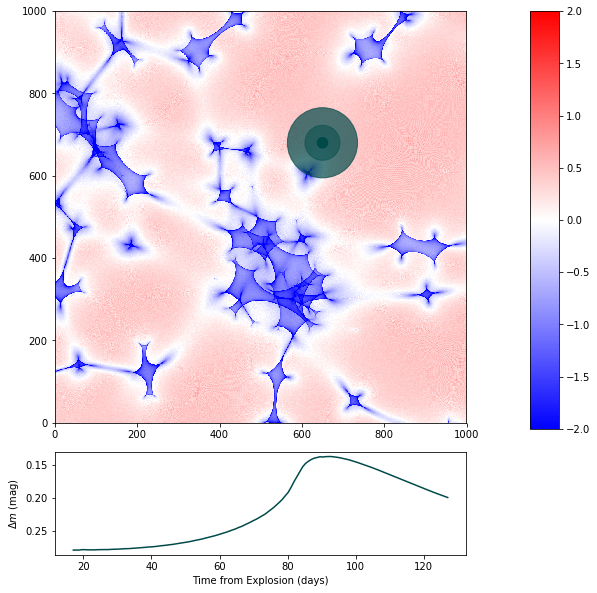

In [360]:
reload(ml)
time,dmag=ml.microcaustic_field_to_curve(fitData,np.arange(0,150,1),.6,1.2,loc=(650,680))

4.69157968315e+12 km


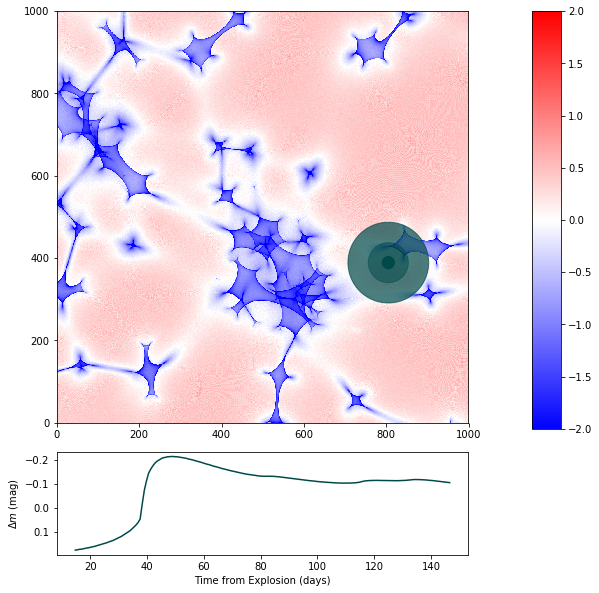

yes
4.69157968315e+12 km


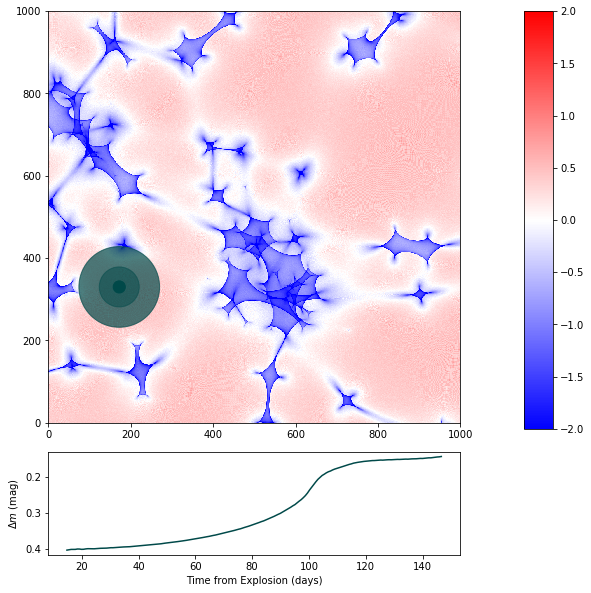

yes


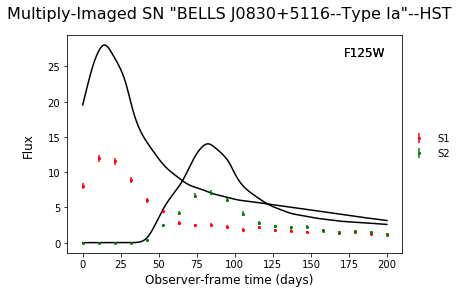

Simulated strongly lensed SN 0


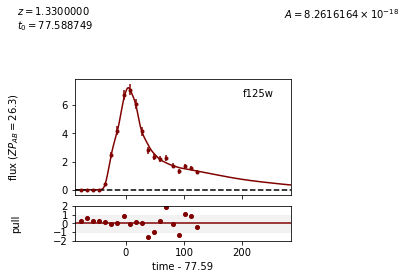

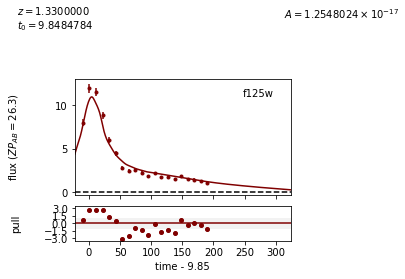

67.74027090026598


ValueError: `bins` must be positive, when an integer

In [4]:
reload(fitting) 
reload(simulation) 
#reload(sncosmo)
nsim = 1
dt_fit_list = [] 
murel_fit_list = [] 

for isim in range(nsim):

    # Part 1 : simulate a doubly-imaged Type Ib SN and fit for time delays
    modname = 'snana-2004gv'#sncosmo.SALT2Source(modeldir='salt2-extended')
    snType = 'Ib'
    #bandlist = ['bessellb', 'bessellv', 'bessellr']
    bandlist = ['F125W']
    lcs = simulation.createMultiplyImagedSN(
        modname, snType, 1.33,z_lens=.53, bands=bandlist,
        zp=26.3, cadence=10., epochs=20.,skynoiseRange=(.001,.005),gain=50. , time_delays=[10., 78.],
        magnifications=[7,3.5], objectName='BELLS J0830+5116--Type Ia', telescopename='HST',
        microlensing_type='AchromaticMicrolensing',
        microlensing_params=fitData,minsnr=5.0)
    
    lcs.plot_object(showfig=True,savefig=True,showmodel=True)
    plt.show()
    #sys.exit()
    #print(lcs.images['S1'].simMeta)
    
    ifig = 0
    print("Simulated strongly lensed SN %i"%isim)
    #lcs.plot_object(showfig=True,savefig=False)

    # Part 2: fit each light curve separately to determine lensing parameters
    lcs_tdfit=fitting.fit_data(lcs, snType='Ib', models=[modname],
                                params=['amplitude','t0'],
                                constants={'z':1.33},t0_guess={'S1':10,'S2':78},
                                bounds={'t0':(-5,5)},
                                combined_or_separate='separate',showPlots=True)



    # TODO: make this more general, i.e. use keywords list instead of s1 and s2.
    #t0_s1 = lcs_tdfit.images['S1'].fits.model.get('t0')
    #t0_s2 = lcs_tdfit.images['S2'].fits.model.get('t0')
    print(np.abs(lcs_tdfit.time_delays['S2']))
    #A_s1 = lcs_tdfit.images['S1'].fits.model.get('amplitude')
    #A_s2 = lcs_tdfit.images['S2'].fits.model.get('amplitude')
    dt_fit_list.append(np.abs(lcs_tdfit.time_delays['S2']))
    #murel_fit_list.append(A_s2/A_s1)
    #plt.plot(dt_fit_list, murel_fit_list,marker='o', color=_COLORLIST5[3], ls=' ')
fig=plt.figure(figsize=(20,10)) 
ax=fig.gca() 
ax.hist(dt_fit_list, bins=nsim/5, normed=True,label='Measured Time Delay')

ax.plot([68,68],ax.get_ylim(),'r--',label='Actual Time Delay') 
ax.legend(loc='upper left',fontsize=16) 
ax.set_title('Type Ib Doubly-Imaged Time Delay Measurement--N=100',size=24) 
ax.set_ylabel('Probability Density',size=20) 
ax.set_xlabel('Relative Time Delay (Days)',size=20) 
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()
plt.close()

In [35]:
from copy import deepcopy
reload(fitting)
lcs_tdfit.time_delays={k:np.abs(float(lcs_tdfit.time_delays[k])) for k in lcs_tdfit.time_delays.keys()}
compFunc,errors=fitting.create_composite_model(lcs_tdfit,'F125W','S2',weight='logz')
sys.exit()
temp=io._sntd_deepcopy(deepcopy(lcs))
print(lcs_tdfit.time_delays)
temp.combine_curves(tds=lcs_tdfit.time_delays,mus=lcs_tdfit.magnifications)
temp.plot_object(combined=True,filename='F125W_mySN',bands=['F125W'])
temp.combined.table.sort('time')
td_bound=np.max(lcs_tdfit.time_delay_errors.values())
mu_bound=np.max(lcs_tdfit.magnification_errors.values())
lcs_tdfit=fitting.fit_data(temp, snType='Ib', models=[modname],refModel=compFunc,
                                params=['amplitude','t0'],
                                constants={'z':1.33},t0_guess=10,
                                bounds={'t0':(-5,5)},combinedGrids={'td':(-5,5),'mu':(-.1,.1)},
                                combined_or_separate='combined',showPlots=True)


SystemExit: 

In [41]:
td={'S2': 67.3, 'S1': 0}
mu={'S2': 0.65, 'S1': 1}
fig=plt.figure()
ax=fig.gca()
time=np.arange(min(lcs.images['S1'].table['time']),max(lcs.images['S1'].table['time']),.1)
ax.plot(time-10-td['S2'],compFunc(time),color='y',linewidth='4')
ax.errorbar(lcs.images['S1'].table['time']-10,lcs.images['S1'].table['flux'],lcs.images['S1'].table['fluxerr'],fmt='r.')
ax.errorbar(lcs.images['S2'].table['time']-td['S2']-10,lcs.images['S2'].table['flux']/mu['S2'],lcs.images['S2'].table['fluxerr'],fmt='b.')
#lcs.plot_object(showfig=True,savefig=True,showmodel=True)
ax.set_ylabel('Flux')
ax.set_xlabel('Time (Days)')
plt.savefig('combibed.pdf',format='pdf',overwrite=True)
plt.close()

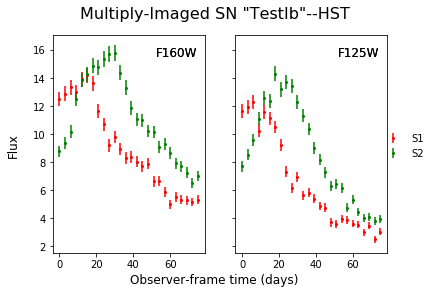

SystemExit: 

In [17]:
reload(fitting) 
reload(simulation) 
nsim = 5
dt_fit_list = [] 
murel_fit_list = [] 

for isim in range(nsim):

    # Part 1 : simulate a doubly-imaged Type Ib SN and fit for time delays
    modname = 'snana-2004gv'
    snType = 'Ib'
    #bandlist = ['bessellb', 'bessellv', 'bessellr']
    bandlist = ['F125W','F160W']
    lcs = simulation.createMultiplyImagedSN(
        modname, snType, 1.33,z_lens=.5, bands=bandlist,
        zp=26.0, cadence=3., epochs=25.,skynoiseRange=(.005,.03),gain=50. ,mjdRange=[0,100.], time_delays=[0., 15.],
        magnifications=np.random.uniform(4,6,2), objectName='Test'+snType, telescopename='HST',
        microlensing_type='AchromaticSplineMicrolensing',
        microlensing_params=[4,2,50],minsnr=5.0)
    
    lcs.plot_object(showfig=True,savefig=False,showmodel=False)
    plt.show()
    sys.exit()
    #print(lcs.images['S1'].simMeta)
    
    ifig = 0
    print("Simulated strongly lensed SN %i"%isim)
    #lcs.plot_object(showfig=True,savefig=False)

    # Part 2: fit each light curve separately to determine lensing parameters
    lcs_tdfit=fitting.fit_data(lcs, snType='Ib', models=['snana-2004gv'],dust='CCM89Dust',effect_frames=['rest'],
                                effect_names=['host'],
                                params=['x0','x1','c'],
                                constants={'z':1.33},
                                bounds={'x1':(-1,1),'c':(-1,1)},
                                combined_or_separate='separate')



    # TODO: make this more general, i.e. use keywords list instead of s1 and s2.
    #t0_s1 = lcs_tdfit.images['S1'].fits.model.get('t0')
    #t0_s2 = lcs_tdfit.images['S2'].fits.model.get('t0')
    print(np.abs(lcs_tdfit.time_delays['S2']))
    #A_s1 = lcs_tdfit.images['S1'].fits.model.get('amplitude')
    #A_s2 = lcs_tdfit.images['S2'].fits.model.get('amplitude')
    dt_fit_list.append(np.abs(lcs_tdfit.time_delays['S2']))
    #murel_fit_list.append(A_s2/A_s1)
    #plt.plot(dt_fit_list, murel_fit_list,marker='o', color=_COLORLIST5[3], ls=' ')
fig=plt.figure(figsize=(20,10)) 
ax=fig.gca() 
ax.hist(dt_fit_list, bins=nsim/5, normed=True,label='Measured Time Delay')

ax.plot([15,15],ax.get_ylim(),'r--',label='Actual Time Delay') 
ax.legend(loc='upper left',fontsize=16) 
ax.set_title('Type Ib Doubly-Imaged Time Delay Measurement--N=100',size=24) 
ax.set_ylabel('Probability Density',size=20) 
ax.set_xlabel('Relative Time Delay (Days)',size=20) 
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()
plt.close()

In [ ]:
reload(fitting) 
reload(simulation) 
nsim = 5
dt_fit_list = [] 
murel_fit_list = [] 

for isim in range(nsim):

    # Part 1 : simulate a doubly-imaged Type Ib SN and fit for time delays
    modname = 'snana-2004gv'
    snType = 'Ib'
    #bandlist = ['bessellb', 'bessellv', 'bessellr']
    bandlist = ['F125W','F160W']
    lcs = simulation.createMultiplyImagedSN(
        modname, snType, 1.33,z_lens=.5, bands=bandlist,
        zp=26.0, cadence=3., epochs=25.,skynoiseRange=(.005,.03),gain=50. ,mjdRange=[0,100.], time_delays=[0., 15.],
        magnifications=np.random.uniform(4,6,2), objectName='Test'+snType, telescopename='HST',
        microlensing_type='AchromaticSplineMicrolensing',
        microlensing_params=[4,2,50],minsnr=5.0)
    
    lcs.plot_object(showfig=True,savefig=False,showmodel=False)
    plt.show()
    sys.exit()
    #print(lcs.images['S1'].simMeta)
    
    ifig = 0
    print("Simulated strongly lensed SN %i"%isim)
    #lcs.plot_object(showfig=True,savefig=False)

    # Part 2: fit each light curve separately to determine lensing parameters
    lcs_tdfit=fitting.fit_data(lcs, snType='Ib', models=['snana-2004gv'],dust='CCM89Dust',effect_frames=['rest'],
                                effect_names=['host'],
                                params=['z','amplitude','t0','hostebv'],
                                bounds={'hostebv':(0,1),'z':(1.28,1.32),'t0':(-10,10)},
                                combined_or_separate='separate',
                                method='minuit')



    # TODO: make this more general, i.e. use keywords list instead of s1 and s2.
    #t0_s1 = lcs_tdfit.images['S1'].fits.model.get('t0')
    #t0_s2 = lcs_tdfit.images['S2'].fits.model.get('t0')
    print(np.abs(lcs_tdfit.time_delays['S2']))
    #A_s1 = lcs_tdfit.images['S1'].fits.model.get('amplitude')
    #A_s2 = lcs_tdfit.images['S2'].fits.model.get('amplitude')
    dt_fit_list.append(np.abs(lcs_tdfit.time_delays['S2']))
    #murel_fit_list.append(A_s2/A_s1)
    #plt.plot(dt_fit_list, murel_fit_list,marker='o', color=_COLORLIST5[3], ls=' ')
fig=plt.figure(figsize=(20,10)) 
ax=fig.gca() 
ax.hist(dt_fit_list, bins=nsim/5, normed=True,label='Measured Time Delay')

ax.plot([15,15],ax.get_ylim(),'r--',label='Actual Time Delay') 
ax.legend(loc='upper left',fontsize=16) 
ax.set_title('Type Ib Doubly-Imaged Time Delay Measurement--N=100',size=24) 
ax.set_ylabel('Probability Density',size=20) 
ax.set_xlabel('Relative Time Delay (Days)',size=20) 
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()
plt.close()